It is one of the Technique used to solve Classification problems , the classification problems are {will the guy get married or not [yes/No]} this type of classificaqtion is called Binary classification 

RealTime Example : If u r wrking in a insurance company ur boss will ask u to prdicit the how likely the customers are going to buy your product with the data given i.e the previous records

Steps to cosider if we r doing any plotting:
 1.Draw the Scatter plot and the linear regression to predict the data in some cases while plotting the linear regression tom
 the data an error will arrise in plotting
 
In this we are applying a Sigmoid function to Plot the lIne y=1/1+e**-(mx+b)

 

In [ ]:
## [[https://www.youtube.com/watch?v=zM4VZR0px8E]]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train7 = pd.read_csv("C:\\Users\\Lap3\\Desktop\\maheshCMR\\train.csv")
train7.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train7.shape

(891, 12)

In [13]:
# removing colums which are not in use
#claimants1.drop(["CASENUM"],axis=1) 
train77 = train7.drop(["Name","Sex","Ticket","Cabin","Embarked"], axis=1,inplace=False)#inplace  to replect in org data
train77.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [14]:
train7.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train77.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [16]:
train7.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# gets you the most occuring value in ATTORNEY column

train7.Cabin.value_counts().index[0]
train7.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [19]:
# gets you the most occuring value in ATTORNEY column
#claimants1.CLMAGE
#claimants1.CLMAGE.value_counts()
train77.Age.value_counts().index[0]
train77.Age.mode()

0    24.0
dtype: float64

In [20]:
#Imputating the missing values with most repeated values in that column

# lambda x:x.fillna(x.value_counts().index[0]) 
# the above line gives you the most repeated value in each column



In [29]:
train77.bfill()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,24.0,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750
8,9,1,3,27.0,0,2,11.1333
9,10,1,2,14.0,1,0,30.0708


In [33]:
# filling the missing value with most occuring value    
train77.iloc[:,:] = train77.iloc[:,:].apply(lambda x:x.fillna(x.value_counts().index[0]))
#claimants3.SEATBELT = claimants1.SEATBELT.fillna(claimants1.SEATBELT.value_counts().index[0])
train77.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [34]:
# Model building
import statsmodels.formula.api as smf
logit_model = smf.logit('Survived ~ PassengerId+Pclass+Age+SibSp+Parch+Fare',data = train77).fit()

Optimization terminated successfully.
         Current function value: 0.580916
         Iterations 6


In [35]:
type(logit_model)
logit_model.params

Intercept      2.674547
PassengerId   -0.000165
Pclass        -0.946423
Age           -0.036818
SibSp         -0.235847
Parch          0.236566
Fare           0.004535
dtype: float64

In [36]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Wed, 14 Aug 2019   Pseudo R-squ.:                  0.1276
Time:                        15:13:16   Log-Likelihood:                -517.60
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 3.795e-30
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.6745      0.456      5.869      0.000       1.781       3.568
PassengerId    -0.0002      0.000     -0.561      0.575      -0.001       0.000
Pclass         -0.9464      0.124     -7.619      0.000      -1.190      -0.703
Age            -0.0368      0.007     -5.571      0.000      -0.050      -0.024
SibSp          -0.2358      0.087     -2.700      0.007      -0.407      -0.065
Parch           0.2366      0.102      2.311      0.021       0.036       0.437
Fare            0.0045      0.002      1.855      0.064      -0.000       0.009
===============================================================================
"""

In [37]:
# prediction using logit_model

y_pred1 = logit_model.predict(train77)
y_pred1

0      0.235440
1      0.602556
2      0.252271
3      0.609163
4      0.195029
5      0.266788
6      0.493500
7      0.350902
8      0.346001
9      0.541188
10     0.440939
11     0.428278
12     0.295939
13     0.374231
14     0.343661
15     0.236250
16     0.306635
17     0.488519
18     0.187945
19     0.265247
20     0.403123
21     0.397769
22     0.335289
23     0.701461
24     0.301792
25     0.382546
26     0.265022
27     0.878918
28     0.265537
29     0.265519
         ...   
861    0.421413
862    0.484126
863    0.092060
864    0.453813
865    0.299819
866    0.370981
867    0.662167
868    0.240813
869    0.400373
870    0.226275
871    0.523302
872    0.596811
873    0.119400
874    0.372816
875    0.303997
876    0.268803
877    0.274304
878    0.239186
879    0.533756
880    0.517691
881    0.184072
882    0.254969
883    0.414108
884    0.231691
885    0.393776
886    0.425717
887    0.734689
888    0.299229
889    0.681460
890    0.189337
Length: 891, dtype: floa

In [38]:
# Creating new column for storing predicted class of Attorney
train77["pred_prob"] = y_pred1
train77.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,pred_prob
0,1,0,3,22.0,1,0,7.2500,0.235440
1,2,1,1,38.0,1,0,71.2833,0.602556
2,3,1,3,26.0,0,0,7.9250,0.252271
3,4,1,1,35.0,1,0,53.1000,0.609163
4,5,0,3,35.0,0,0,8.0500,0.195029


In [39]:
# filling all the cells with zeroes
train77["PValue"] = 0
train77.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,pred_prob,PValue
0,1,0,3,22.0,1,0,7.2500,0.235440,0
1,2,1,1,38.0,1,0,71.2833,0.602556,0
2,3,1,3,26.0,0,0,7.9250,0.252271,0
3,4,1,1,35.0,1,0,53.1000,0.609163,0
4,5,0,3,35.0,0,0,8.0500,0.195029,0


In [40]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
train77.loc[train77.pred_prob >= 0.5,"PValue"] = True
train77.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,pred_prob,PValue
0,1,0,3,22.0,1,0,7.2500,0.235440,0
1,2,1,1,38.0,1,0,71.2833,0.602556,True
2,3,1,3,26.0,0,0,7.9250,0.252271,0
3,4,1,1,35.0,1,0,53.1000,0.609163,True
4,5,0,3,35.0,0,0,8.0500,0.195029,0


In [41]:
# confusion matrix 
confusion_matrix = pd.crosstab(train77['Survived'],train77.PValue)
confusion_matrix

PValue,0,True
Survived,,
0,474,75
1,191,151


In [43]:
# accuracy
acc = (474+151)/(474+151+191+75)
acc
np.mean(train77.Survived == train77.PValue)

0.7014590347923682

In [45]:
#2nd method using sklearn
train77.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,pred_prob,PValue
0,1,0,3,22.0,1,0,7.2500,0.235440,0
1,2,1,1,38.0,1,0,71.2833,0.602556,True
2,3,1,3,26.0,0,0,7.9250,0.252271,0
3,4,1,1,35.0,1,0,53.1000,0.609163,True
4,5,0,3,35.0,0,0,8.0500,0.195029,0


In [49]:
X = train77.iloc[:,2:]
X.astype(int)
X.head()

,Pclass,Age,SibSp,Parch,Fare,pred_prob,PValue
0,3,22.0,1,0,7.2500,0.235440,0
1,1,38.0,1,0,71.2833,0.602556,True
2,3,26.0,0,0,7.9250,0.252271,0
3,1,35.0,1,0,53.1000,0.609163,True
4,3,35.0,0,0,8.0500,0.195029,0


In [51]:
y=train77.iloc[:,1]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 7)
(268, 7)
(623,)
(268,)


In [61]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
pred = reg.predict(X_test)
pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0], dtype=int64)

In [63]:
np.mean(y_test ==  pred)


0.6902985074626866

ValueError: x and y must be the same size

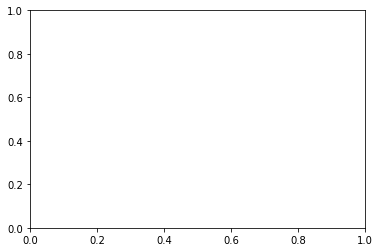

In [65]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_test, reg.predict(X_test))

plt.show()